In [ ]:
# import os
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras import layers, models
# from tensorflow.keras.optimizers import Adam
# import matplotlib.pyplot as plt
# import numpy as np

# # Define paths for training, validation, and testing datasets
# base_dir = 'D:\\7th sem\\Deep Learning\\Dataset\\Pneumonia_X-Ray'
# train_dir = os.path.join(base_dir, 'train')
# val_dir = os.path.join(base_dir, 'val')
# test_dir = os.path.join(base_dir, 'test')

# # Data augmentation for training images to improve model generalization
# train_datagen = ImageDataGenerator(
#     rescale=1./255,          # Normalize pixel values to range [0, 1]
#     shear_range=0.2,         # Random shear transformation to images
#     zoom_range=0.2,          # Randomly zoom into images
#     horizontal_flip=True     # Randomly flip images horizontally
# )

# # Data generator for validation images (only rescaling, no augmentation)
# val_datagen = ImageDataGenerator(rescale=1./255)

# # Load training images in batches with data augmentation applied
# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(150, 150),  # Resize images to 150x150 pixels
#     batch_size=32,           # Number of images per batch
#     class_mode='binary'      # Binary classification (two classes)
# )

# # Load validation images in batches (only rescaled)
# val_generator = val_datagen.flow_from_directory(
#     val_dir,
#     target_size=(150, 150),  # Resize validation images to 150x150 pixels
#     batch_size=32,
#     class_mode='binary'
# )

# # Define the architecture for the convolutional neural network (CNN) model
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

# # Compile the model with Adam optimizer, binary crossentropy loss, and accuracy metric
# model.compile(
#     optimizer=Adam(),
#     loss='binary_crossentropy',
#     metrics=['accuracy']
# )

# # Train the model on the training data and validate with validation data
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // train_generator.batch_size,
#     epochs=4,  # Use more epochs in practice for better training
#     validation_data=val_generator,
#     validation_steps=val_generator.samples // val_generator.batch_size
# )

# # Load and rescale test data for final evaluation of model performance
# test_datagen = ImageDataGenerator(rescale=1./255)
# test_generator = test_datagen.flow_from_directory(
#     test_dir,
#     target_size=(150, 150),
#     batch_size=32,
#     class_mode='binary'
# )

# # Evaluate the model on test data and display test accuracy
# test_loss, test_acc = model.evaluate(test_generator)
# print(f"Test accuracy: {test_acc:.4f}")

# # Display sample training images with labels to visualize the dataset
# x_batch, y_batch = next(train_generator)
# plt.figure(figsize=(10, 10))
# for i in range(9):
#     plt.subplot(3, 3, i + 1)
#     plt.imshow(x_batch[i])
#     plt.title("Pneumonia" if y_batch[i] == 1 else "Normal")
#     plt.axis('off')

# plt.tight_layout()
# plt.show()


In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Directories for training, validation, and test data
base_dir = 'D:\\7th sem\\Deep Learning\\Dataset\\Pneumonia_X-Ray'  # Change this to your actual path
train_dir = os.path.join(base_dir, 'train')  # Path to the training data
val_dir = os.path.join(base_dir, 'val')      # Path to the validation data
test_dir = os.path.join(base_dir, 'test')    # Path to the test data

In [6]:
# Data augmentation for training images
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to range [0, 1]
    shear_range=0.2,  # Apply random shearing to images
    zoom_range=0.2,   # Apply random zoom to images
    horizontal_flip=True  # Randomly flip images horizontally
)

# Data generator for validation images (no augmentation, only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)  # Normalize validation images

# Create data generators for training and validation datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150 pixels
    batch_size=32,           # Number of images to be yielded from the generator per batch
    class_mode='binary'      # Use binary classification (two classes)
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),  # Resize validation images to 150x150 pixels
    batch_size=32,
    class_mode='binary'
)


Found 1547 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [10]:
# Stage b: Defining the model’s architecture
# Define the CNN model
model = models.Sequential()  # Create a sequential model
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))  # First convolutional layer
model.add(layers.MaxPooling2D((2, 2)))  # First max pooling layer

model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # Second convolutional layer
model.add(layers.MaxPooling2D((2, 2)))  # Second max pooling layer

model.add(layers.Conv2D(128, (3, 3), activation='relu'))  # Third convolutional layer
model.add(layers.MaxPooling2D((2, 2)))  # Third max pooling layer

model.add(layers.Flatten())  # Flatten the output from the previous layer
model.add(layers.Dense(128, activation='relu'))  # Fully connected layer
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(
    optimizer=Adam(),  # Use Adam optimizer
    loss='binary_crossentropy',  # Use binary crossentropy loss function
    metrics=['accuracy']  # Track accuracy metric
)

# Stage c: Training the model
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Number of batches per epoch
    epochs=4,  # Number of epochs to train (increase for better results)
    validation_data=val_generator,  # Use the validation generator
    validation_steps=val_generator.samples // val_generator.batch_size  # Number of validation batches
)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/4
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5600 - loss: 0.8503

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


48/48 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.5617 - loss: 0.8466 - val_accuracy: 0.6250 - val_loss: 0.5466
Epoch 2/4
 1/48 ━━━━━━━━━━━━━━━━━━━━ 12s 274ms/step - accuracy: 0.7500 - loss: 0.4652

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7500 - loss: 0.4652 - val_accuracy: 0.7500 - val_loss: 0.3637
Epoch 3/4
48/48 ━━━━━━━━━━━━━━━━━━━━ 39s 803ms/step - accuracy: 0.8371 - loss: 0.4126 - val_accuracy: 0.8125 - val_loss: 0.4279
Epoch 4/4
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8125 - loss: 0.3829 - val_accuracy: 0.9375 - val_loss: 0.2489


Found 484 images belonging to 2 classes.
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 760ms/step - accuracy: 0.8668 - loss: 0.3435
Test accuracy: 0.8554


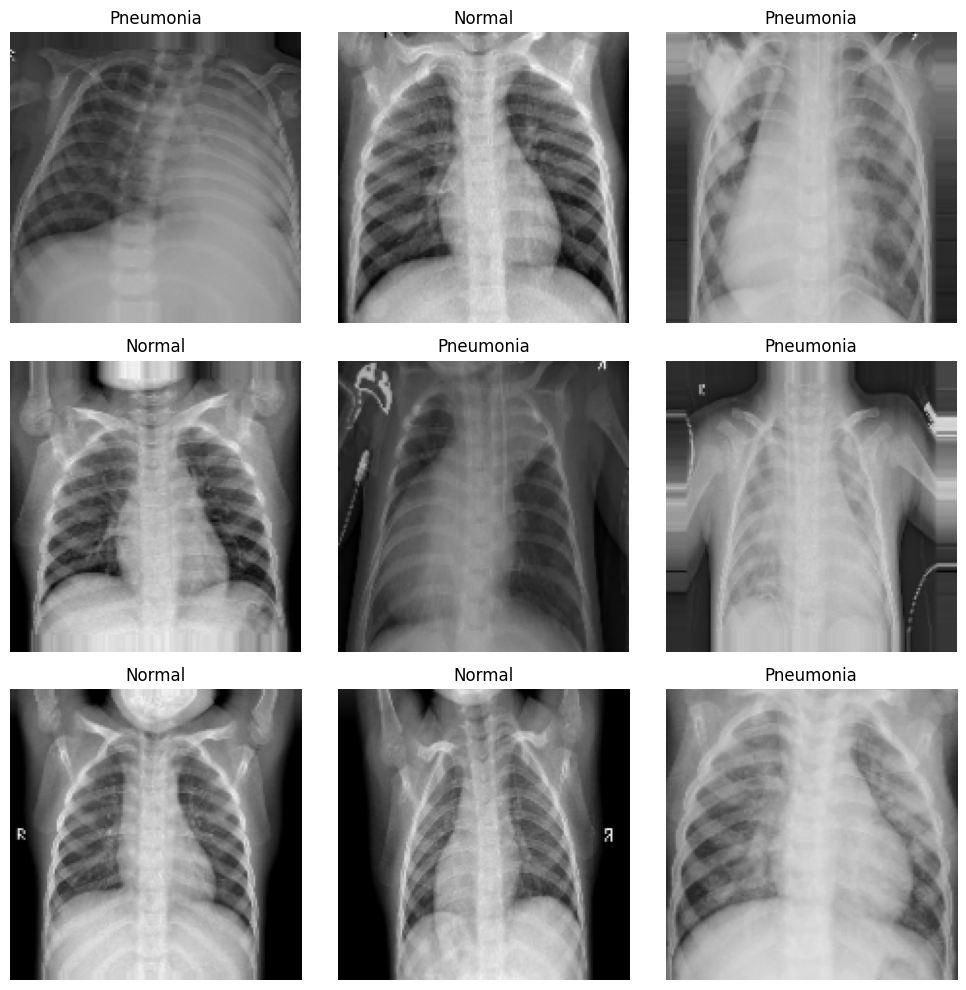

In [11]:

# Stage d: Estimating the model's performance
# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize test images
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Resize test images to 150x150 pixels
    batch_size=32,
    class_mode='binary'  # Use binary classification
)

# Evaluate the model and obtain loss and accuracy
test_loss, test_acc = model.evaluate(test_generator)  
print(f"Test accuracy: {test_acc:.4f}")  # Print the test accuracy

# Display images from the training set with their labels
x_batch, y_batch = next(train_generator)  # Get a batch of images and labels from the training generator

# Plotting the images in a 3x3 grid
plt.figure(figsize=(10, 10))  # Create a figure of size 10x10 inches
for i in range(9):  # Display the first 9 images
    plt.subplot(3, 3, i + 1)  # Create a subplot for each image
    plt.imshow(x_batch[i])  # Show the image
    plt.title("Pneumonia" if y_batch[i] == 1 else "Normal")  # Set title based on label
    plt.axis('off')  # Hide axes for a cleaner look

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plotted images
